<a href="https://colab.research.google.com/github/AndresBanquezBio/IA2024-2/blob/main/01_exploracion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

Cargamos el dataset

In [26]:
tData = pd.read_csv("train.csv")

In [54]:
tData

,ID,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,ESTU_PAGOMATRICULAPROPIO,RENDIMIENTO_GLOBAL
0,904256,20212,ENFERMERIA,BOGOTÁ,Entre 5.5 millones y menos de 7 millones,Menos de 10 horas,Estrato 3,Si,Técnica o tecnológica incompleta,Postgrado,No,medio-alto
1,645256,20212,DERECHO,ATLANTICO,Entre 2.5 millones y menos de 4 millones,0,Estrato 3,No,Técnica o tecnológica completa,Técnica o tecnológica incompleta,No,bajo
2,308367,20203,MERCADEO Y PUBLICIDAD,BOGOTÁ,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) completa,No,bajo
3,470353,20195,ADMINISTRACION DE EMPRESAS,SANTANDER,Entre 4 millones y menos de 5.5 millones,0,Estrato 4,Si,No sabe,Secundaria (Bachillerato) completa,No,alto
4,989032,20212,PSICOLOGIA,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 3,Si,Primaria completa,Primaria completa,No,medio-bajo
...,...,...,...,...,...,...,...,...,...,...,...,...
692495,25096,20195,BIOLOGIA,LA GUAJIRA,Entre 500 mil y menos de 1 millón,Entre 11 y 20 horas,Estrato 2,Si,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) incompleta,Si,medio-alto
692496,754213,20212,PSICOLOGIA,NORTE SANTANDER,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Primaria incompleta,Secundaria (Bachillerato) incompleta,No,bajo
692497,504185,20183,ADMINISTRACIÓN EN SALUD OCUPACIONAL,BOGOTÁ,Entre 1 millón y menos de 2.5 millones,Menos de 10 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) incompleta,Si,medio-bajo
692498,986620,20195,PSICOLOGIA,TOLIMA,Entre 2.5 millones y menos de 4 millones,Menos de 10 horas,Estrato 1,No,Primaria completa,Primaria completa,Si,bajo


El dataset tiene un total de 12 variables (Columnas) donde 1 es de salida.\
El dataset tiene un total de 692500 datos (Filas)

In [28]:
for i in tData.columns:
  print(f'{i}: {tData[i].dtype}')

ID: int64
PERIODO: int64
ESTU_PRGM_ACADEMICO: object
ESTU_PRGM_DEPARTAMENTO: object
ESTU_VALORMATRICULAUNIVERSIDAD: object
ESTU_HORASSEMANATRABAJA: object
FAMI_ESTRATOVIVIENDA: object
FAMI_TIENEINTERNET: object
FAMI_EDUCACIONPADRE: object
FAMI_EDUCACIONMADRE: object
ESTU_PAGOMATRICULAPROPIO: object
RENDIMIENTO_GLOBAL: object


Primero que todo observamos que unicamente tenemos 2 valores numericos, los demás que son tipo object significa que son strings.
Pero el ID es un identificador y periodo parece ser un indicador de un año y periodo del año.

Tambien miramos cuales valores únicos hay en estas variables de tipo object

In [33]:
for i in tData.columns:
  if tData[i].dtype == 'object':
    print(f'{i}: {len(tData[i].unique())})')

ESTU_PRGM_ACADEMICO: 948)
ESTU_PRGM_DEPARTAMENTO: 31)
ESTU_VALORMATRICULAUNIVERSIDAD: 9)
ESTU_HORASSEMANATRABAJA: 6)
FAMI_ESTRATOVIVIENDA: 8)
FAMI_TIENEINTERNET: 3)
FAMI_EDUCACIONPADRE: 13)
FAMI_EDUCACIONMADRE: 13)
ESTU_PAGOMATRICULAPROPIO: 3)
RENDIMIENTO_GLOBAL: 4)


 Ahora exploramos de manera general el dataset.

Miramos cuantos estudiantes hay por localidad (Departamento)

In [56]:
tData.groupby('ESTU_PRGM_DEPARTAMENTO').ID.count() # Utilizamos ID para el conteo pues es el unico que deberia estar en todos

,ID
ESTU_PRGM_DEPARTAMENTO,
AMAZONAS,40
ANTIOQUIA,83607
ARAUCA,589
ATLANTICO,41020
BOGOTÁ,282159
BOLIVAR,20629
BOYACA,14048
CALDAS,11640
CAQUETA,2659


Cuantos estudiantes hay por cada estrato.

In [58]:
tData.groupby('FAMI_ESTRATOVIVIENDA').ID.count() # La distribución se centra entre estrato 2 y 3

,ID
FAMI_ESTRATOVIVIENDA,
Estrato 1,111991
Estrato 2,232671
Estrato 3,210685
Estrato 4,65514
Estrato 5,23608
Estrato 6,12605
Sin Estrato,3289


Otro analisis interesante es sobre ver cuantos estudiantes hay en cada uno de los rendimientos globales, pero vemos que realmente esta repartido de una manera bastante regular.

In [51]:
tData.groupby('RENDIMIENTO_GLOBAL').ID.count()

,ID
RENDIMIENTO_GLOBAL,
alto,175619
bajo,172987
medio-alto,171619
medio-bajo,172275


Tambien es necesario mirar cuales son los valores nulos que hay en cada columna del dataset entregado.


In [93]:
tData.isnull().sum()/tData.shape[0]*100 # Esto muestra el porcentaje de filas que no tienen el dato de la columna

,0
ID,0.000000
PERIODO,0.000000
ESTU_PRGM_ACADEMICO,0.000000
ESTU_PRGM_DEPARTAMENTO,0.000000
ESTU_VALORMATRICULAUNIVERSIDAD,0.907870
ESTU_HORASSEMANATRABAJA,4.455884
FAMI_ESTRATOVIVIENDA,4.640722
FAMI_TIENEINTERNET,3.845343
FAMI_EDUCACIONPADRE,3.347004
FAMI_EDUCACIONMADRE,3.417184


Gracias a esto vemos que realmente el porcentaje de valores nulos que hay es bastante pequeño en comparación al total de datos que hay.

Un analisis util que podemos hacer es mirar como se correlacionan las variables del dataset entre si, para esto utilizaremos una matriz de correlaciones.
Pero se puede ver que muchas columnas son tipo objeto y estas no pueden usarse en una correlacion ya que la correlacion correlacionará numeros, por tanto usarmemos la libreria seaborn para hacer una codificación.

In [64]:
tData2 = tData.copy()
# Ahora haremos una codificación categorica
for i in tData2.columns:
  if tData2[i].dtype == 'object':
    tData2[i] = pd.Categorical(tData2[i]).codes

In [65]:
tData2.head()

,ID,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,ESTU_PAGOMATRICULAPROPIO,RENDIMIENTO_GLOBAL
0,904256,20212,300,4,3,3,2,1,11,5,0,2
1,645256,20212,249,3,1,0,2,0,10,11,0,1
2,308367,20203,819,4,1,4,2,1,8,8,0,1
3,470353,20195,14,26,2,0,3,1,4,8,0,0
4,989032,20212,907,1,1,2,2,1,6,6,0,3


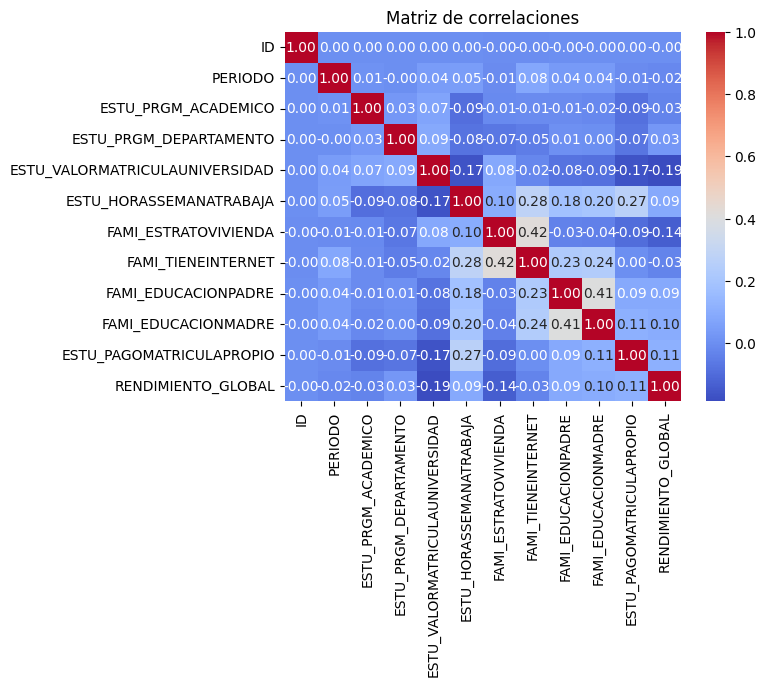

In [76]:
corrMatrix = tData2.corr()
sns.heatmap(corrMatrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Matriz de correlaciones")
plt.show()

In [86]:
correlaciones = abs(corrMatrix.RENDIMIENTO_GLOBAL).sort_values(ascending=False).head(7)
correlaciones

,RENDIMIENTO_GLOBAL
RENDIMIENTO_GLOBAL,1.000000
ESTU_VALORMATRICULAUNIVERSIDAD,0.186452
FAMI_ESTRATOVIVIENDA,0.139347
ESTU_PAGOMATRICULAPROPIO,0.114224
FAMI_EDUCACIONMADRE,0.097810
FAMI_EDUCACIONPADRE,0.088883
ESTU_HORASSEMANATRABAJA,0.087706


Para hacer este analisis tomamos unicamente los primeros 6 valores mas relacionados con la salida de interes y además, les sacamos el valor absoluto porque no nos interesa si es una correlación negativa o positiva sino que sea una correlación alta (Lo mas cercano posible a 1)

In [95]:
# Ahora miramos del dataframe correlaciones el numero de estudiantes que hay en cada uno de los valores unicos, excepto en RENDIMIENTO_GLOBAL pues es la salida
for i in correlaciones.index:
  if i != 'RENDIMIENTO_GLOBAL':
    print(tData.groupby(i).ID.count())
    print('-'*50)

ESTU_VALORMATRICULAUNIVERSIDAD
Entre 1 millón y menos de 2.5 millones      204048
Entre 2.5 millones y menos de 4 millones    127430
Entre 4 millones y menos de 5.5 millones     69736
Entre 5.5 millones y menos de 7 millones     38490
Entre 500 mil y menos de 1 millón            78704
Menos de 500 mil                             80263
Más de 7 millones                            68014
No pagó matrícula                            19528
Name: ID, dtype: int64
--------------------------------------------------
FAMI_ESTRATOVIVIENDA
Estrato 1      111991
Estrato 2      232671
Estrato 3      210685
Estrato 4       65514
Estrato 5       23608
Estrato 6       12605
Sin Estrato      3289
Name: ID, dtype: int64
--------------------------------------------------
ESTU_PAGOMATRICULAPROPIO
No    382201
Si    303801
Name: ID, dtype: int64
--------------------------------------------------
FAMI_EDUCACIONMADRE
Educación profesional completa           85326
Educación profesional incompleta         22470

Podemos decir, con la matriz de correlación que estas variables (Y los valores mostrados) son los que mas afectan al rendimiento final del estudiante.\
Aún asi hay que tener en cuenta que al utilizar una correlación de Pearson obtenemos mas que todo las relaciones lineales.\
Otra cosa importante que podemos concluir es que no hay dependencia lineal entre las variables mostradas, pues ninguna de ellas tiene correlaciones superiores al 50%, siendo la mayor 42% entre si hay internet y el estrato, seguido de 41% entre el nivel de estudio del padre y la madre.

Además, analizando todos los datos de antes tambien podemos concluir que el periodo y el ID son irrelevantes para el resultado, teniendo el ID una correlación de 0 y periodo la segunda mas pequeña de ~2%, esto es interesante porque son los unicos valores que son inicialmente numericos.

Por ultimo analizamos la normalidad de la variable de salida.

In [101]:
stats.shapiro(tData2.RENDIMIENTO_GLOBAL)

/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 692500.
  res = hypotest_fun_out(*samples, **kwds)


ShapiroResult(statistic=0.8555325775897238, pvalue=3.6405647839342405e-161)

Vemos que esto no es una variable logaritmica, pues su pvalue es muy pequeño, para serlo deberia ser >0.05, esto es porque como vimos antes, los valores de la variable de salida tienen casi el mismo resultado.